In [1]:
"""
Classification
	K- Nearest Neighbor
2. The data contains lists of octamers (8 amino acids) and a flag (-1 or 1) depending on whether HIV-1 
protease will cleave in the central position (between amino acids 4 and 5). Build a machine learning  model 
for the dataset, please refer document inside zip file for additional information
"""

'\nClassification\n\tK- Nearest Neighbor\n2. The data contains lists of octamers (8 amino acids) and a flag (-1 or 1) depending on whether HIV-1 \nprotease will cleave in the central position (between amino acids 4 and 5). Build a machine learning  model \nfor the dataset, please refer document inside zip file for additional information\n'

In [2]:
#import libraries
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt  
#library for feature scaling
from sklearn.preprocessing import StandardScaler

# #Classification library
from sklearn.neighbors import KNeighborsClassifier

#libraries for encoding dataset columns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

import pickle 
import os, sys
import csv
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import importlib.util

In [3]:
# importing template file 
spec = importlib.util.spec_from_file_location("Util_class", "/home/admin1/PycharmProjects/Machine-Learning/Week10/Util/util.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
obj_util = foo.Util_class()

In [4]:
# load dataset
dataset_original = pd.read_csv ("schillingData.txt", delimiter = ",",names=["Peptides", "Result"])
dataset = dataset_original
dataset.head()

,Peptides,Result
0,AAAAAPAK,-1
1,AAAAPAKV,-1
2,AAAELGAR,-1
3,AAAPAKVE,-1
4,AAAPVAAA,-1


In [5]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 3272 rows and 2 Columns


In [6]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 2 columns):
Peptides    3272 non-null object
Result      3272 non-null int64
dtypes: int64(1), object(1)
memory usage: 51.2+ KB


In [7]:
# descibe the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Result,3272.0,-0.734719,0.678475,-1.0,-1.0,-1.0,-1.0,1.0


In [8]:
# handling missing data if nessesary
"""
if missing values are present
imputer = Imputer(missing_values=0, axis=0)
imputer = imputer.fit(x_data[:, 3:16])
"""
dataset.isnull().sum()

Peptides    0
Result      0
dtype: int64

In [9]:
#check for NAN values
dataset.isna().sum()

Peptides    0
Result      0
dtype: int64

In [10]:
# check for duplicate values
dataset.duplicated().sum()

0

Skewness of y is 2.167118052555557


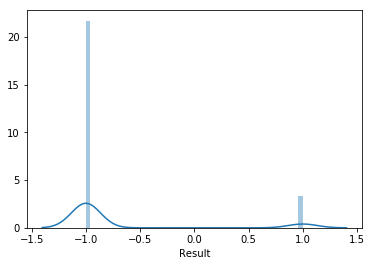

In [11]:
# check skewness for target variable
sb.distplot(dataset['Result'])
print ("Skewness of y is {}".format(dataset['Result'].skew()))

In [12]:
def remove_skew_square():
    print("\nSkewness for Target")
    dataset['Result'] = (np.sqrt(dataset['Result']))
    print("Mean: ",dataset['Result'].mean(),"Median: ", dataset['Result'].median(), 'Skewness is :', dataset['Result'].skew())

    print("Draw histogram")
    plt.hist(dataset['Result'])
    plt.show()
    
# remove_skew_square()
# Here if we remove skewness result gives large amount of NAN values

In [13]:
dataset.isna().sum()

Peptides    0
Result      0
dtype: int64

In [14]:
# Seperate all amino acids
peptides = np.array([[dataset["Peptides"][i][j] for i in range(dataset.shape[0])] for j in range(8)])
peptides.shape

(8, 3272)

In [15]:
# Store the seperated amino acids into a dataframe
dataset2 = pd.DataFrame(peptides.T, columns=list('ABCDEFGH'))
dataset2.shape


(3272, 8)

In [16]:
dataset2.head()

,A,B,C,D,E,F,G,H
0,A,A,A,A,A,P,A,K
1,A,A,A,A,P,A,K,V
2,A,A,A,E,L,G,A,R
3,A,A,A,P,A,K,V,E
4,A,A,A,P,V,A,A,A


In [17]:
# assign 2nd dataset to 1st one
dataset = dataset.assign(**dataset2)
#OR
# dataset = pd.concat([dataset,dataset2])
dataset.head()

,Peptides,Result,A,B,C,D,E,F,G,H
0,AAAAAPAK,-1,A,A,A,A,A,P,A,K
1,AAAAPAKV,-1,A,A,A,A,P,A,K,V
2,AAAELGAR,-1,A,A,A,E,L,G,A,R
3,AAAPAKVE,-1,A,A,A,P,A,K,V,E
4,AAAPVAAA,-1,A,A,A,P,V,A,A,A


In [18]:
# drop unwanted column
dataset = dataset.drop(['Peptides'], axis=1)

In [19]:
dataset = dataset[['A','B','C','D','E','F','G','H','Result']]
dataset.head()

,A,B,C,D,E,F,G,H,Result
0,A,A,A,A,A,P,A,K,-1
1,A,A,A,A,P,A,K,V,-1
2,A,A,A,E,L,G,A,R,-1
3,A,A,A,P,A,K,V,E,-1
4,A,A,A,P,V,A,A,A,-1


In [20]:
print("Dataset shape",dataset.shape)
dataset.head()

Dataset shape (3272, 9)


,A,B,C,D,E,F,G,H,Result
0,A,A,A,A,A,P,A,K,-1
1,A,A,A,A,P,A,K,V,-1
2,A,A,A,E,L,G,A,R,-1
3,A,A,A,P,A,K,V,E,-1
4,A,A,A,P,V,A,A,A,-1


In [21]:
# create directory to store csv files
os.mkdir("CSV_files")

In [22]:
#split dataset into train, test and cross validation also save csv files
obj_util.splitdata(dataset, 0.35, 0.40,"CSV_files" )

train :  (2126, 9)  test :  (1146, 9)
train_data :  (1275, 9)  crossV_data :  (851, 9)


In [23]:
# load train dataset
train_dataset = pd.read_csv ("CSV_files/train_file.csv")
print("Train Dataset has {} rows and {} Columns".format(train_dataset.shape[0],train_dataset.shape[1])) 
# load dataset for Cross Validation
CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Cross validation Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 

Train Dataset has 1275 rows and 9 Columns
Cross validation Dataset has 851 rows and 9 Columns


In [24]:
#data Preprocessing
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 9 columns):
A         1275 non-null object
B         1275 non-null object
C         1275 non-null object
D         1275 non-null object
E         1275 non-null object
F         1275 non-null object
G         1275 non-null object
H         1275 non-null object
Result    1275 non-null int64
dtypes: int64(1), object(8)
memory usage: 89.7+ KB


In [25]:
train_dataset.head()

,A,B,C,D,E,F,G,H,Result
0,F,I,Q,S,I,I,S,T,-1
1,I,Q,N,V,P,L,E,D,-1
2,N,I,Q,G,I,T,K,P,-1
3,F,K,P,P,A,D,Y,K,-1
4,L,W,E,S,L,E,N,A,1


In [26]:
# seperate fetures and label

x_train = train_dataset.loc[:, train_dataset.columns != 'Result'].values
y_train = train_dataset.loc[:,train_dataset.columns == 'Result'].values

# convert ndarray to dataframe
df1 =  pd.DataFrame(x_train)

print("x_train :",x_train.shape,"& y_train:",y_train.shape)

#for cross validation
x_crossval = CV_dataset.loc[:, CV_dataset.columns != 'Result'].values
y_crossval = CV_dataset.loc[:,CV_dataset.columns == 'Result'].values

# convert ndarray to dataframe
df2 =  pd.DataFrame(x_crossval)
print("x_cv :",x_crossval.shape,"& y_cv:",y_crossval.shape)

x_train : (1275, 8) & y_train: (1275, 1)
x_cv : (851, 8) & y_cv: (851, 1)


In [27]:
df2.shape

(851, 8)

In [28]:
# Handle categorical data
x_train_dataset = obj_util.Categorical_data(df1)

In [29]:
# Handle categorical data for cross validation dataset
cv_dataset = obj_util.Categorical_data(df2)

In [30]:
x_train_dataset.shape, cv_dataset.shape

((1275, 160), (851, 160))

In [31]:
#feature scalling (here data will be converted into float)
def feature_scalling(x_train,x_crossval):
    sc_x = StandardScaler()
    x_train = sc_x.fit_transform(x_train)
    
    sc_x_cv = StandardScaler()
    x_crossval = sc_x.fit_transform(x_crossval)
    
    return sc_x, x_train,sc_x_cv, x_crossval
    
sc_x, x_train,sc_x_cv, x_crossval = feature_scalling(x_train_dataset,cv_dataset)


In [32]:
print(len(x_train), len(x_crossval))

1275 851


In [33]:
class KNN_sklearn():
    
    def create_module(self,x_train,y_train):
        # fitting KNN Classification to the training set
        classifier = KNeighborsClassifier()
        classifier.fit(x_train,y_train)
        return classifier
    

def main():
    #class obj created
    obj  = KNN_sklearn()

    # create KNN classification module
    classifier = obj.create_module(x_train,y_train)
    print("\nModule created")
    print("classifier object",classifier)

    # y prediction
    y_pre = obj_util.y_prediction(x_train, classifier)
#     print("\n\n y_prediction:",y_pre)
#     print(y_pre.shape)
    
    # Calculate accuracy
    accuracy_score,average_precision,auc=obj_util.accuracy(y_pre,y_train)
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)

    # show confusion matrix
    cm = obj_util.confusion_matrix(y_train,y_pre)
    print("\n\nConfusion Matrix:\n",cm)
    
#     obj_util.visualization(x_train,y_train, classifier, "KNN Classification(Training set)", "Age", "Estimate Salary")
    
    obj_util.create_piklefile(classifier,'KNN2.pkl' )
    print("\nPikle file created")


if __name__ == '__main__':
    main()



Module created
classifier object KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


Average accuracy_score: 89.9607843137255
Average precision-recall score: 38.81
Average Roc-AUC: 68.818


Confusion Matrix:
 [[1077   21]
 [ 107   70]]

Pikle file created


In [34]:
# cross validation        
def Cross_validation():
    # Load pickle file object
    file1 = open('KNN2.pkl', 'rb')
    classifier1 = pickle.load(file1)

    # y_prediction ( cross validation) 
    y_predicted1 = obj_util.y_prediction(x_crossval, classifier1)
    
    # Calculate accuracy
    accuracy_score,average_precision,auc=obj_util.accuracy(y_predicted1, y_crossval)
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)

    # show Confusion matrix
    cm = obj_util.confusion_matrix(y_crossval, y_predicted1)
    print("\n\nConfusion Matrix:\n",cm)
#     print("\n\nConfusion Matrix:\n",metrics.confusion_matrix(y_crossval, y_predicted1))
    
#     obj_util.visualization(x_crossval, y_crossval, classifier1, "KNN(Cross_validation set)", "Age", "Estimate Salary")
    
# call definactio
Cross_validation()




Average accuracy_score: 86.95652173913044
Average precision-recall score: 26.14
Average Roc-AUC: 62.108


Confusion Matrix:
 [[707  24]
 [ 87  33]]
